In [7]:
from mxnet import autograd
from mxnet import gluon
from mxnet import image
from mxnet import init
from mxnet import nd
from mxnet.gluon.model_zoo import vision as model
from mxnet.gluon import nn
from mxnet.gluon.data import vision
import numpy as np
import random
import mxnet as mx
import sys
sys.path.insert(0, '../../utils')
from netlib import *
import os
import shutil
import utils
from dataset import *
from cifar10_utils import *
import matplotlib.pyplot as plt
% matplotlib inline

ctx = mx.gpu(0)

def mkdir_if_not_exist(path):
    if not os.path.exists(os.path.join(*path)):
        os.makedirs(os.path.join(*path))
        
root_dir = '/home/hui/dataset/CIFAR10/'
ArrayDataset_dir = root_dir + "/arraydataset/"

In [2]:
from mxnet import nd

def load_all_data_label(pathes):
    all_data, all_label = None, None
    for path in pathes:
        data, label = nd.load(path)
        label = label.reshape((-1,)).astype('float32')
        if all_data is None:
            all_data, all_label = data, label
        else:
            all_data = nd.concat(all_data, data, dim=0)
            all_label = nd.concat(all_label, label, dim=0)
    return all_data, all_label

In [5]:
def inv_normalize(data, clip=True):
    mean=np.array([0.4914, 0.4822, 0.4465])
    std=np.array([0.2023, 0.1994, 0.2010])
    images = data.transpose((0, 2, 3, 1)).asnumpy()
    images = images * std + mean
    images = images.transpose((0, 3, 1, 2)) * 255
    if clip: 
        images = images.clip(0, 255)
    return images
    
def show_data(data, clip=True):
    images = inv_normalize(data, clip)
    show_images(images)
    
def _transform_test(data, label):
    im = data.astype('float32') / 255
    auglist = image.CreateAugmenter(data_shape=(3, 32, 32), mean=np.array([0.4914, 0.4822, 0.4465]),
                                   std=np.array([0.2023, 0.1994, 0.2010]))
    for aug in auglist:
        im = aug(im)
    im = nd.transpose(im, (2, 0, 1))
    return im, nd.array([label]).astype('float32')

datas, labels = load_all_data_label(['/home/hui/dataset/CIFAR10/arraydataset/backgrad_resnet18_me_200e_iter10.ndarray'])
train_ds = MyArrayDataset([datas, labels], transform=_transform_test)
train_data = gluon.data.DataLoader(train_ds, 32, shuffle=False, last_batch='keep', num_workers=4)

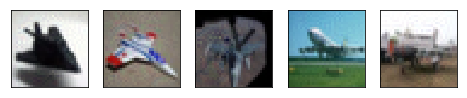

In [6]:
for data, label in train_data:
    break
    
show_data(data[:5])

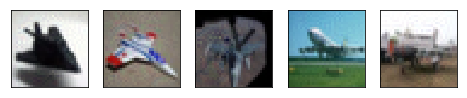

In [13]:
show_images(datas[:5].asnumpy().transpose((0, 3, 1, 2)))

In [27]:
nd.mean(datas / 255 > 1)


[ 0.00740589]
<NDArray 1 @cpu(0)>

In [25]:
np.mean(datas[4].asnumpy() / 255 > 1)

0.096354166666666671